In [27]:
import coreapi
 
# Note: BasicAuthentication is not recommended, use the API token instead
server = r'https://api.quantum-inspire.com'
email='thijs.hartmann@hotmail.nl'
password='80Z*tyZnkJ&!pNrW'
auth = coreapi.auth.BasicAuthentication(username=email, password=password)
 
# Initialize a client & load the schema document
client = coreapi.Client(auth=auth)
schema = client.get(f'{server}/schema')
 
# Interact with the API endpoint
action = ["projects", "list"]
result = client.action(schema, action)

In [13]:
# from quantuminspire.qiskit import QI
# Replace 'your_api_token_here' with your actual API token
# QI.set_authentication("5ccb083db6a3df41112ee196c829effcd1ed36fd")


In [32]:
from quantuminspire.credentials import get_token_authentication
auth = get_token_authentication()

In [8]:
from getpass4 import getpass
from coreapi.auth import BasicAuthentication
from quantuminspire.api import QuantumInspireAPI

email = 'thijs.hartmann@hotmail.nl'
password = '80Z*tyZnkJ&!pNrW'

server_url = r'https://api.quantum-inspire.com'
authentication = BasicAuthentication(email, password)
qi = QuantumInspireAPI(server_url, authentication, 'python_1')

Enter mail address
Enter password


In [30]:
qasm = '''version 1.0

qubits 3

# start writing your code here
prep_z q[0] #state initialization in the z-basis in the |0> state
prep_z q[1] #state initialization in the z-basis in the |0> state
prep_z q[2] #state initialization in the z-basis in the |0> state

H q[0] #execute Hadamard gate on qubit 0
CNOT q[0],q[1] # CNOT gate between qubits 0 and 1
CNOT q[0],q[2]

Measure_x q[0] # Measurement on qubit 0 in the z-basis
Measure_y q[1]
Measure_z q[2]

display # write the current quantum state to the output file
'''

backend_type = qi.get_backend_type_by_name('QX single-node simulator')
result = qi.execute_qasm(qasm, backend_type=backend_type, number_of_shots=64)

if result.get('histogram', {}):
    print(result['histogram'])
else:
    reason = result.get('raw_text', 'No reason in result structure.')
    print(f'Result structure does not contain proper histogram data. {reason}')


Your experiment can not be optimized and may take longer to execute, see https://www.quantum-inspire.com/kbase/optimization-of-simulations/ for details.


[OrderedDict([('6', 0.15625), ('3', 0.140625), ('2', 0.0625), ('5', 0.109375), ('1', 0.140625), ('7', 0.09375), ('0', 0.15625), ('4', 0.140625)])]


In [17]:
print(result['histogram'])

[OrderedDict([('7', 0.1328125), ('3', 0.203125), ('5', 0.1640625), ('4', 0.09375), ('6', 0.109375), ('1', 0.1328125), ('2', 0.1015625), ('0', 0.0625)])]


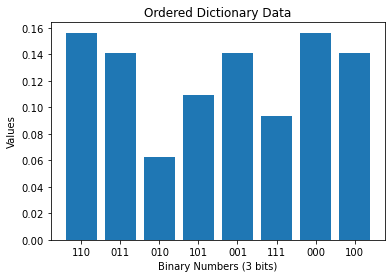

In [31]:
import matplotlib.pyplot as plt
from collections import OrderedDict

# Your data
data = result['histogram']

# Function to convert a number to a binary string with 3 bits
def to_binary_3bit(num):
    return format(num, '03b')

# Extract the keys (converted to binary) and values from the ordered dictionary
keys = [to_binary_3bit(int(key)) for key in data[0].keys()]
values = list(data[0].values())

# Create a bar plot
plt.bar(keys, values)
plt.xlabel('Binary Numbers (3 bits)')
plt.ylabel('Values')
plt.title('Ordered Dictionary Data')
plt.show()


In [23]:
nr_qubits = 6

backend_type = qi.get_backend_type_by_name('QX single-node simulator')


In [25]:
qasm = f'''version 1.0

qubits {nr_qubits}

# start writing your code here
prep_z q[0] #state initialization in the z-basis in the |0> state
prep_z q[1] #state initialization in the z-basis in the |0> state
prep_z q[2] #state initialization in the z-basis in the |0> state
prep_z q[3]
prep_z q[4]

H q[0] #execute Hadamard gate on qubit 0
CNOT q[0],q[1] # CNOT gate between qubits 0 and 1
CNOT q[0],q[2]
CNOT q[0],q[3]
CNOT q[0],q[4]




Measure_x q[0] # Measurement on qubit 0 in the z-basis
Measure_x q[1]
Measure_x q[2]
Measure_x q[3]
Measure_x q[4]

display # write the current quantum state to the output file
'''

result = qi.execute_qasm(qasm, backend_type=backend_type, number_of_shots=4096)

if result.get('histogram', {}):
    print("nice")
else:
    reason = result.get('raw_text', 'No reason in result structure.')
    print(f'Result structure does not contain proper histogram data. {reason}')


Your experiment can not be optimized and may take longer to execute, see https://www.quantum-inspire.com/kbase/optimization-of-simulations/ for details.


nice
